In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creating a DTS_recording class to speed up creating multiple recording

In [16]:
class DTS_recording:
    def __init__(self,frame_by_frame_distance_array,frames_per_second):
        self.frame_by_frame_distance_array = [abs(i - frame_by_frame_distance_array[0]) for i in frame_by_frame_distance_array]        
        self.frames_per_second = frames_per_second
        self.constant_time_array = [i/self.frames_per_second for i in range(len(self.frame_by_frame_distance_array))]
        self.change_in_frame_by_frame_distance_array = np.diff(self.frame_by_frame_distance_array)
        self.velocities = self.change_in_frame_by_frame_distance_array * self.frames_per_second / 1000
        self.median_velocity = np.median(self.velocities)
    
    
    def rolling_average(self):
        data_array = np.array(self.change_in_frame_by_frame_distance_array)
        moving_avg = np.convolve(data_array, np.ones(5)/5, mode='valid')
        return moving_avg
        
    def plot(self):
        plt.figure(figsize=(18,10))
        sns.set_style('darkgrid')

        plt.subplot(2,1,1)
        plt.scatter(self.frame_by_frame_distance_array,self.constant_time_array)
        plt.title("Relationship between Distance Traveled (mm) and Time elapsed (s) for the DTS system at {velocity} m/s".format(velocity = self.median_velocity ))
        plt.ylabel("Time (s)")
        plt.xlabel("Distance traveled (mm)")

        plt.subplot(2,1,2)   
        plt.scatter(self.frame_by_frame_distance_array[:-1],self.velocities)     
        plt.title("Relationship between Distance Traveled (mm) and the corresponding velocity in m/s for the DTS system at {velocity} m/s".format(velocity = self.median_velocity))
        plt.xlabel("Distance traveled (mm)")
        plt.ylabel("Velocity at distance (m/s)")

Import Results and Create an Object for each Test

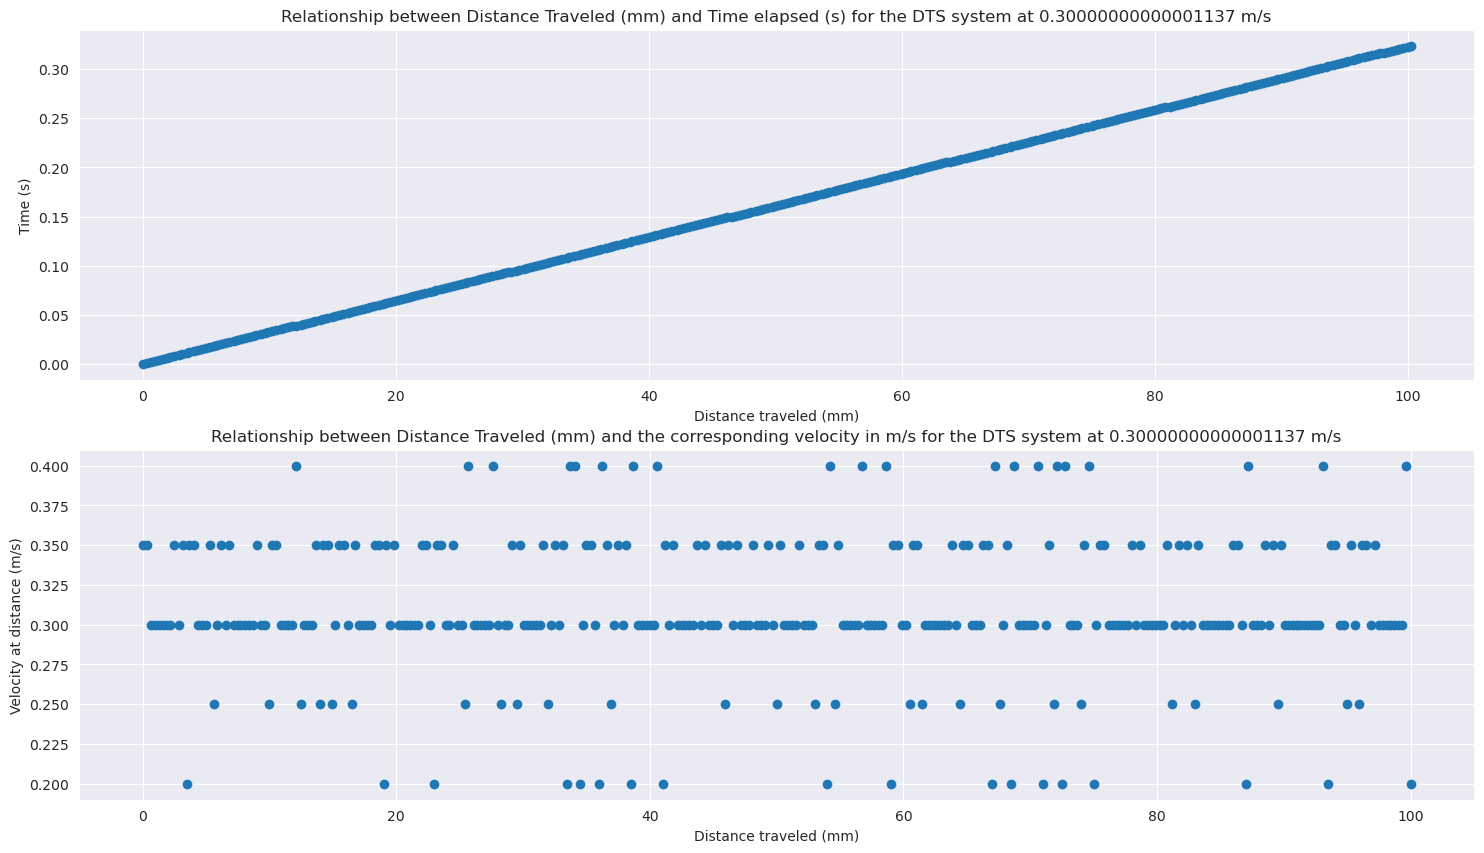

In [17]:
from DTS_frame_by_frame_displacement_results import C0494_frame_by_frame_distance_array

C0494 = DTS_recording(C0494_frame_by_frame_distance_array,1000)

C0494.plot()


Text(0.5, 1.0, 'Histogram detailing distribrution of velocities along a 50mm stroke length')

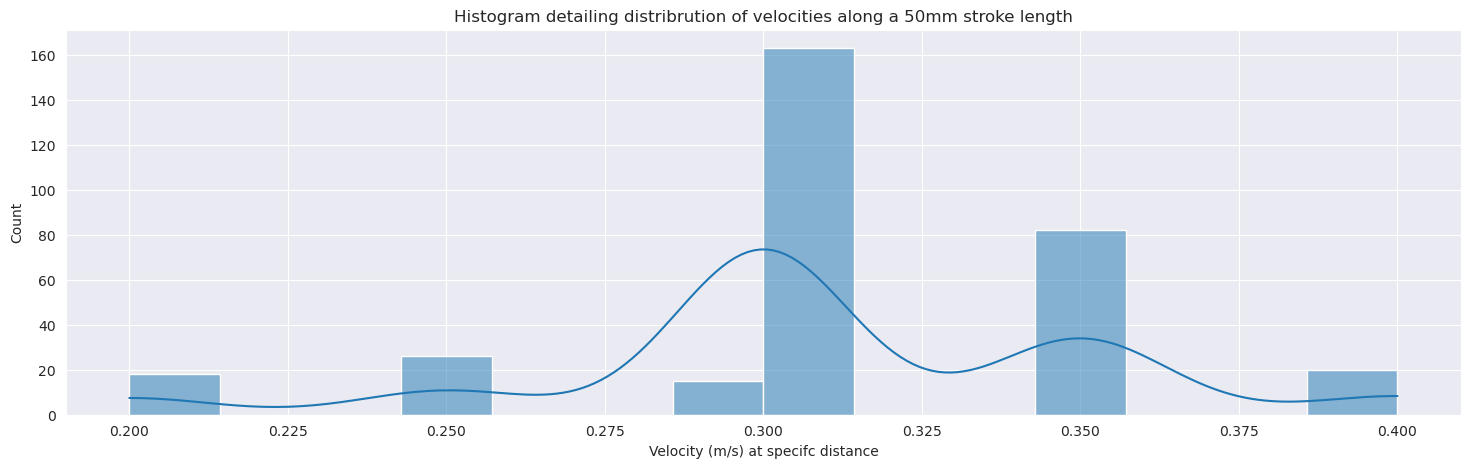

In [18]:
plt.figure(figsize=(18,5))
sns.histplot(C0494.velocities,kde=True)
plt.xlabel("Velocity (m/s) at specifc distance")
plt.title("Histogram detailing distribrution of velocities along a 50mm stroke length")

In [19]:
def plot_10_cycles(distance_data):
    data_in_order = [abs(i - distance_data[0]) for i in distance_data]   
    cycle1 = []
    cycle2 = []
    cycle3 = []
    cycle4 = []
    cycle5 = []
    cycle6 = []
    cycle7 = []
    cycle8 = []
    cycle9 = []
    cycle10 = []

    for i in data_in_order:
        if i < 10:
            cycle1.append(i)
        elif i < 20:
            cycle2.append(i)
        elif i < 30:
            cycle3.append(i)
        elif i < 40:
            cycle4.append(i)
        elif i < 50:
            cycle5.append(i)
        elif i < 60:
            cycle6.append(i)
        elif i < 70:
            cycle7.append(i)
        elif i < 80:
            cycle8.append(i)
        elif i < 90:
            cycle9.append(i)
        elif i < 100:
            cycle10.append(i)
        else:
            pass
        
    return [cycle1, cycle2, cycle3, cycle4, cycle5, cycle6, cycle7, cycle8, cycle9, cycle10]


def zero_cycle(cycle):
    return [i - cycle[0] for i in cycle]

velocity graph of all cycles overlayed

Text(0.5, 0, 'distance (mm)')

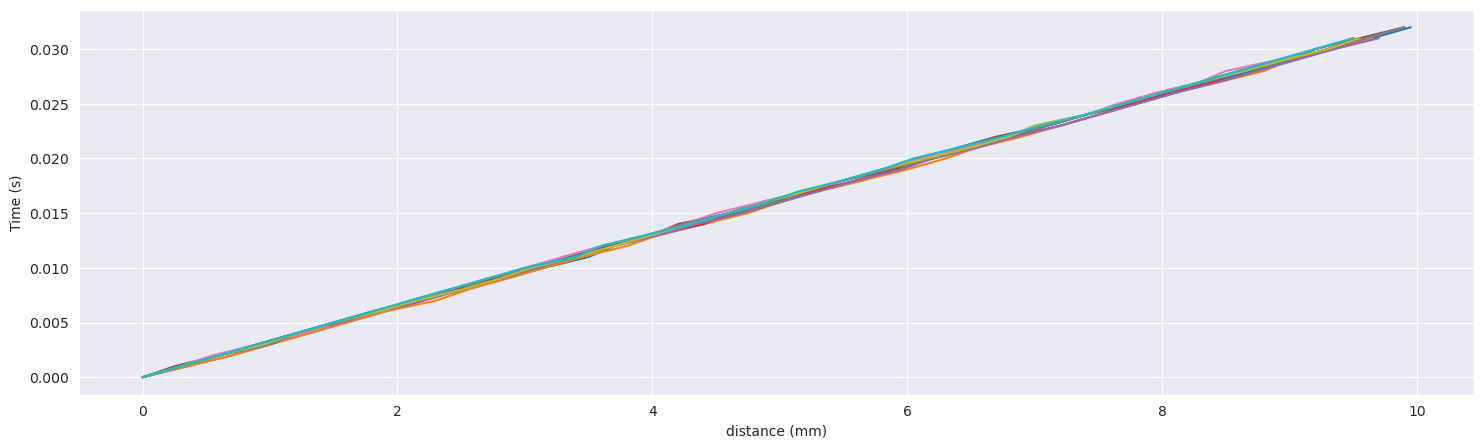

In [20]:
cycles = plot_10_cycles(C0494_frame_by_frame_distance_array)
zeroed_cycles = [zero_cycle(cycle) for cycle in cycles]

plt.figure(figsize = (18,5))
for i in range(10):
    plt.plot(zeroed_cycles[i],[i/1000 for i in range(len(zeroed_cycles[i]))])
    
plt.ylabel("Time (s)")
plt.xlabel("distance (mm)")


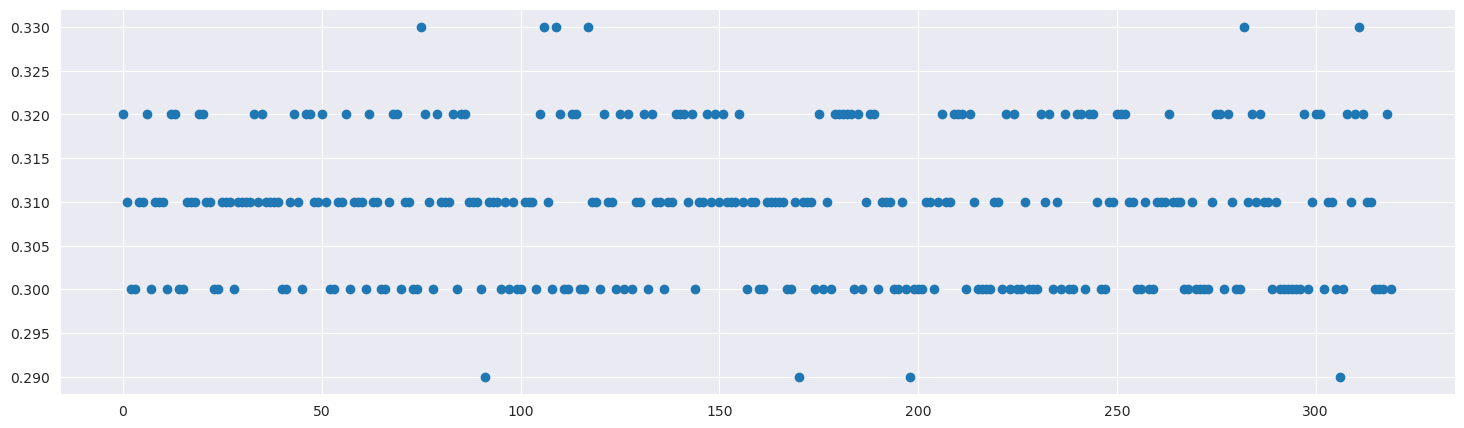

In [21]:
plt.figure(figsize = (18,5))
list = C0494.rolling_average()
plt.scatter(range(len(list)),list)
